In [1]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,accuracy_score

In [2]:
mci=pd.read_csv(r'medical_cost_insurance.csv')

In [3]:
mci.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
mci.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
mci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


"""We come to initial understanding of the data, here we see 4 columns which has numeric values 2 columns have categorial data and 1 column has boolean value
we see that there are 1338 entries with 7 columns that are the reason that can affect the price of the policy cost

"""

In [6]:
mci.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#As the mean and median is nearly equal for age, bmi & children we can say that the data is equally distributed

In [7]:
mci.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

there are no null values in the data

In [8]:
#prmci=ProfileReport(mci)
#prmci

trying to see the spread through visualization for each column through histplot

<Axes: xlabel='age', ylabel='Count'>

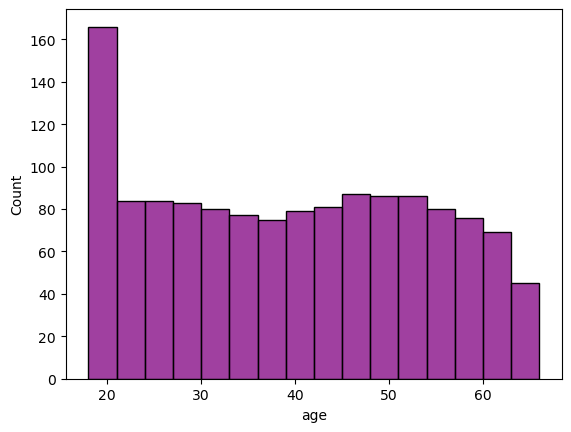

In [9]:
sns.histplot(data=mci,x='age', bins=10, binwidth=3, color='Purple')

In [10]:
mci['age'].value_counts().head(5)

18    69
19    68
50    29
51    29
47    29
Name: age, dtype: int64

Max number of individuals are in their early 20s

<Axes: xlabel='bmi', ylabel='Count'>

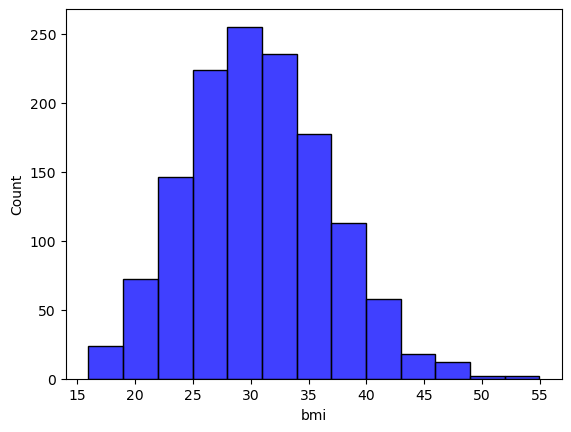

In [11]:
sns.histplot(data=mci,x='bmi', bins=10, binwidth=3, color='Blue')

In [12]:
mci['bmi'].value_counts().head(5)

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
Name: bmi, dtype: int64

The healthy normal weight range is a BMI between 18.5 and 24.9; a body mass index of 22 is in the middle of that range.

in above plot it is evident that the max individuals are beyond the ideal BMI ratio.

<Axes: xlabel='children', ylabel='count'>

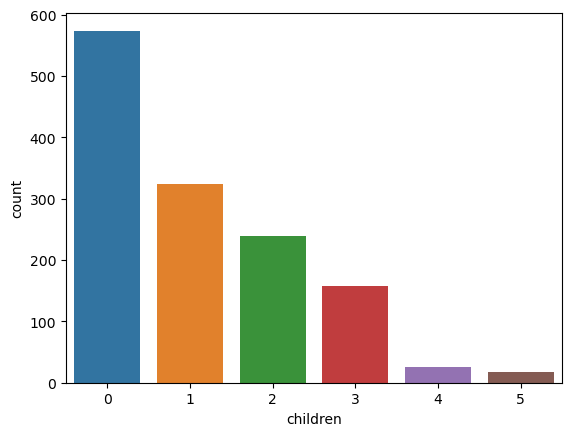

In [13]:
sns.countplot(data=mci,x='children')

In [14]:
mci['children'].value_counts().head(6)

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

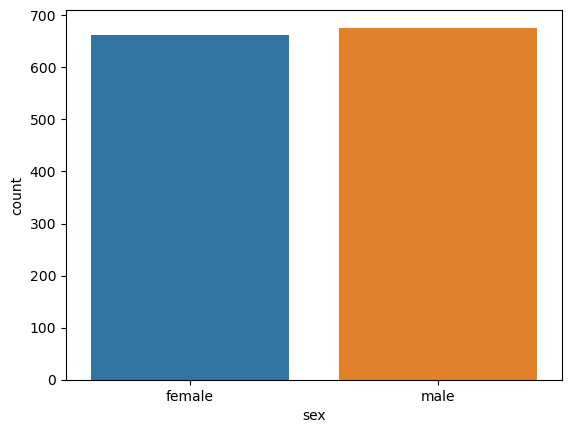

In [15]:
sns.countplot(data=mci,x='sex')

In [16]:
mci['sex'].value_counts().head(6)

male      676
female    662
Name: sex, dtype: int64

<Axes: xlabel='region', ylabel='count'>

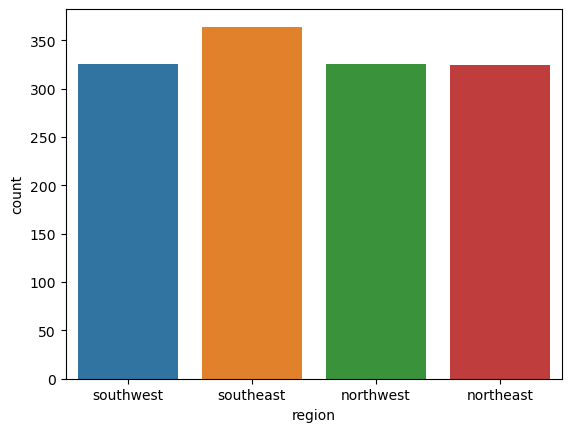

In [17]:
sns.countplot(data=mci,x='region')

In [18]:
mci['region'].value_counts().head(6)

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<Axes: xlabel='smoker', ylabel='count'>

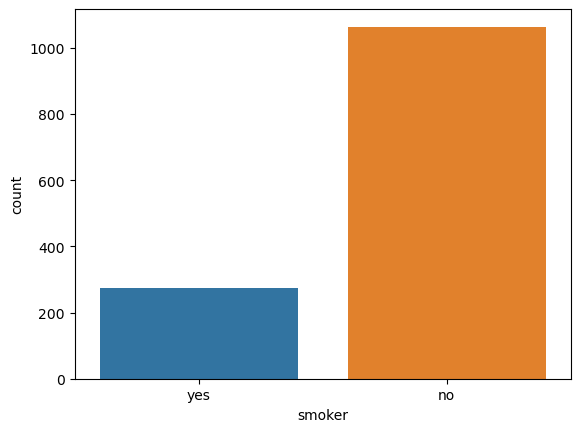

In [19]:
sns.countplot(data=mci,x='smoker')

In [20]:
mci['smoker'].value_counts().head(6)

no     1064
yes     274
Name: smoker, dtype: int64

the above graph shows that maximum individuals do not have kids

as the data has 3 categorial data we will have to encode to be usable during analysis

In [21]:
mci

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [22]:
mci.replace({'sex':{'male':0,'female':1}}, inplace=True)
mci.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
mci.replace({'region':{'southwest':0,'southeast':1,'northwest':2,'northeast':3}}, inplace=True)

In [23]:
mci

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,0,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,2,10600.54830
1334,18,1,31.920,0,1,3,2205.98080
1335,18,1,36.850,0,1,1,1629.83350
1336,21,1,25.800,0,1,0,2007.94500


Using train test to divide the sets and then scaling the data

In [24]:
X=mci.iloc[:,:-1]
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,0
1,18,0,33.770,1,1,1
2,28,0,33.000,3,1,1
3,33,0,22.705,0,1,2
4,32,0,28.880,0,1,2
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,2
1334,18,1,31.920,0,1,3
1335,18,1,36.850,0,1,1
1336,21,1,25.800,0,1,0


In [25]:
Y=mci.iloc[:,-1]
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [26]:
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [27]:
print(x.shape)
print(Y.shape)

(1338, 6)
(1338,)


In [28]:
x_train,x_test,y_train,y_test =train_test_split(x,Y, train_size=0.30, random_state=42)

In [29]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(401, 6)
(937, 6)
(401,)
(937,)


Training the models

In [30]:
model_regression = { 
    "Linear Regression" : LinearRegression(),
        "Decision Tree" : DecisionTreeRegressor(),
        "Random Forest" : RandomForestRegressor(),
    "Gradient Boosting" :GradientBoostingRegressor()   
}

In [31]:
for i,model in model_regression.items():
    model.fit(x_train,y_train)
    print(f'{i} trained')

Linear Regression trained
Decision Tree trained
Random Forest trained
Gradient Boosting trained


Output

In [32]:
for i, model in model_regression.items():
    print(f'{i} R^2 Score: {format(model.score(x_test, y_test), ".3f")}')


Linear Regression R^2 Score: 0.761
Decision Tree R^2 Score: 0.675
Random Forest R^2 Score: 0.835
Gradient Boosting R^2 Score: 0.836


In [33]:
for i, model in model_regression.items():
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'{i} MAE: {format(mae, ".3f")}')


Linear Regression MAE: 4365.378
Decision Tree MAE: 3489.877
Random Forest MAE: 2992.789
Gradient Boosting MAE: 3036.232


As per the outcome for R^2 and MAE the best model is Random Forest

creating a data to text

In [34]:
data = {'age':38,'sex':1, 'bmi': 30.23,'children':2,'smoker':0,'region':3}

In [35]:
df=pd.DataFrame(data,index=[0])
df

,age,sex,bmi,children,smoker,region
0,38,1,30.23,2,0,3


In [36]:
rfr= RandomForestRegressor()
rfr.fit(x,Y)
print(rfr.predict(df))

[26092.8541659]


In [37]:
rfr= RandomForestRegressor()
rfr.fit(x,Y)

RandomForestRegressor()

saving the model

In [38]:
import joblib

In [39]:
joblib.dump(rfr,"model_lin_rfr")

['model_lin_rfr']

In [40]:
mod=joblib.load('model_lin_rfr')

In [41]:
mod.predict(df)

array([25516.2243439])

END